# Sentiment Analysis using Keras and IMDB dataset  
Nov 19, 2019  
Advanced Techniques in Remote Sensing

Author: Vaasudevan Srinivasan (https://vaasudevans.github.io)  
Reference: https://keras.io/examples/imdb_cnn_lstm/

In [0]:
# Text processing
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing import sequence

# Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.utils import plot_model

# Dataset
from keras.datasets import imdb

# Disable all tensorflow warnings and errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Disable deprecation warnings
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [0]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

In [0]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print("Training, Testing sequences", len(x_train), len(x_test))

Loading data...
Training, Testing sequences 25000 25000


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('After padding:- x_train shape:', x_train.shape)
print('After padding:- x_test shape:', x_test.shape)
print(x_train[0], y_train[0])

After padding:- x_train shape: (25000, 100)
After padding:- x_test shape: (25000, 100)
[ 1415    33     6    22    12   215    28    77    52     5    14   407
    16    82 10311     8     4   107   117  5952    15   256     4     2
     7  3766     5   723    36    71    43   530   476    26   400   317
    46     7     4 12118  1029    13   104    88     4   381    15   297
    98    32  2071    56    26   141     6   194  7486    18     4   226
    22    21   134   476    26   480     5   144    30  5535    18    51
    36    28   224    92    25   104     4   226    65    16    38  1334
    88    12    16   283     5    16  4472   113   103    32    15    16
  5345    19   178    32] 1


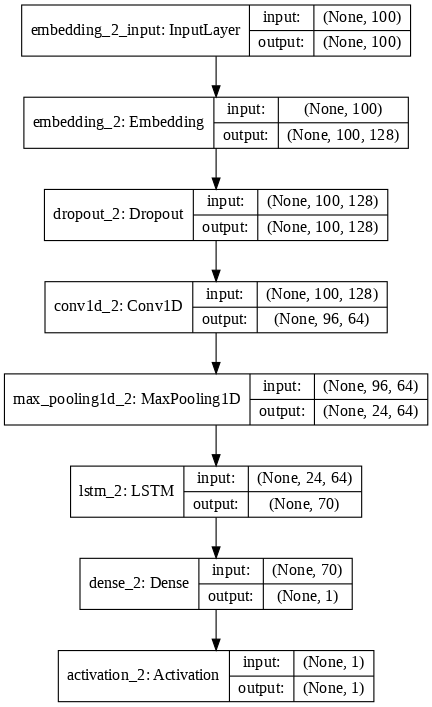

In [0]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',   # No padding
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

plot_model(model,show_shapes=True, show_layer_names=True, dpi=80)

In [0]:
# Training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 80s 3ms/step - loss: 0.3926 - acc: 0.8131 - val_loss: 0.3221 - val_acc: 0.8616
Epoch 2/2
25000/25000 [==============================] - 8s 326us/step
Test score: 0.3689092292144895
Test accuracy: 0.8543999938964844


# Testing

In [0]:
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + 3) for k, v in word_to_id.items()}
word_to_id.update([("<PAD>", 0), ("<START>", 1), ("<UNK>", 2), ("<UNUSED>", 3)])
id_to_word = {value: key for key, value in word_to_id.items()}

def predict_review(review):

    review_ids = []
    
    # Tokenize and get word index
    tokens = text_to_word_sequence(review)
    for t in tokens:
        id_ = word_to_id.get(t, word_to_id["<UNK>"])
        if id_ > max_features:
            review_ids.append(word_to_id["<UNUSED>"])
        else:
            review_ids.append(id_)

    # Pad with zeros
    padded_review_ids = sequence.pad_sequences([review_ids],
                                               value=word_to_id["<PAD>"],
                                               maxlen=maxlen)
    print(padded_review_ids)

    return model.predict(padded_review_ids)[0]

In [0]:
reviews = ['movie is great',                            # Mohammad
           'joker is pretty dark',                      # Danny
           'Acting was good; direction was horrible',   # Vaasu
           'angry birds was childish'                   # Danny
          ]

In [0]:
for r in reviews:
    print(r, predict_review(r))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 20  9 87]]
movie is great [0.7264335]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 6199    9
   184  465]]
joker is pretty dark [0.50120264]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  

In [0]:
[(id_to_word[i],i) for i in x_train[0]]

[('cry', 1415),
 ('at', 33),
 ('a', 6),
 ('film', 22),
 ('it', 12),
 ('must', 215),
 ('have', 28),
 ('been', 77),
 ('good', 52),
 ('and', 5),
 ('this', 14),
 ('definitely', 407),
 ('was', 16),
 ('also', 82),
 ('congratulations', 10311),
 ('to', 8),
 ('the', 4),
 ('two', 107),
 ('little', 117),
 ("boy's", 5952),
 ('that', 15),
 ('played', 256),
 ('the', 4),
 ('<UNK>', 2),
 ('of', 7),
 ('norman', 3766),
 ('and', 5),
 ('paul', 723),
 ('they', 36),
 ('were', 71),
 ('just', 43),
 ('brilliant', 530),
 ('children', 476),
 ('are', 26),
 ('often', 400),
 ('left', 317),
 ('out', 46),
 ('of', 7),
 ('the', 4),
 ('praising', 12118),
 ('list', 1029),
 ('i', 13),
 ('think', 104),
 ('because', 88),
 ('the', 4),
 ('stars', 381),
 ('that', 15),
 ('play', 297),
 ('them', 98),
 ('all', 32),
 ('grown', 2071),
 ('up', 56),
 ('are', 26),
 ('such', 141),
 ('a', 6),
 ('big', 194),
 ('profile', 7486),
 ('for', 18),
 ('the', 4),
 ('whole', 226),
 ('film', 22),
 ('but', 21),
 ('these', 134),
 ('children', 476),
 

In [0]:
review = ["%s. movie was great" % i for i in range(100)] # ['0. movie was great', '1. movie was great', '2. movie was great', ...]
print("Number of words: ", len(''.join(review).split()))
predict_review(''.join(review))

Number of words:  301
[[ 2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16
   2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16
   2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16
   2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16  2 20 16
   2 20 16 87]]


array([0.6101886], dtype=float32)

In [0]:
len(word_to_id) # Count of unique words in the review dataset

88588